In [1]:
from __future__ import print_function, division
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/usr/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Functions 

In [2]:
class L(list):
    """
    A subclass of list that can accept additional attributes.
    Should be able to be used just like a regular list.

    a = L( 1, 2, 4, 8 , x="Hey!",y="Yo" )
    """
    def __new__(self, *args, **kwargs):
        return super(L, self).__new__(self, args, kwargs)

    def __init__(self, *args, **kwargs):
        if len(args) == 1 and hasattr(args[0], '__iter__'):
            list.__init__(self, args[0])
        else:
            list.__init__(self, args)
        self.__dict__.update(kwargs)

    def __call__(self, **kwargs):
        self.__dict__.update(kwargs)
        return self

In [3]:
'''
While loop in Tensorflow
'''
def my_loop():

    def condition(v,t,current_x,current_u):
        return tf.less(t,num_epochs)

    def body(v,t,current_x,current_u):
        #h1=(t/tf_tau1 - 1)*tf_lamb*tf_c
        h1=tf.cond(t_true,lambda:(t/tf_tau1 - 1)*tf_lamb*tf_c,lambda:  - tf_tau2*tf_lamb*tf_c  )
        y=tf.matmul(tf_W,current_x) 
        h2=-tf_eta*(y-tf_theta)
        next_u=current_u + h1+h2
        next_x=tf.sigmoid(tf_beta*next_u)
        #u_series.append(next_u)
        #x_series.append(next_x)
        #print(next_x)
        y1=tf.matmul(tf_W,current_x)
        y2=tf.matmul(tf_W,next_x)
        y3=tf.norm(y1-y2)
        #t=tf.add(t,1)
        v=tf.cond(tf.norm(y3)<eps,lambda:t,lambda:tf.constant(-10,tf.float32))
        t=tf.cond(tf.norm(y3)<eps,lambda:tf.constant(num_epochs+1,tf.float32),lambda: tf.add(t,1))
        current_u=next_u
        current_x=next_x
        return(v,t,current_x,current_u)

    loop_vars=[v,t,current_x,current_u]

    return(tf.while_loop(condition,body,loop_vars))

In [4]:
'''
W and theta matrix and vector of TSP 
'''

def B_matrix(n,i):
    B=np.zeros((n,n))
    B[i,:]=np.ones(n)
    return B

def A_matrix(n):
    A=np.zeros((2*n,0))
    I=np.identity(n)
    for i in range(n):
        B=B_matrix(n,i)
        C=np.concatenate((I,B),axis=0)
        A=np.concatenate((A,C),axis=1)
    A = np.float32(A)
    return(A)

def W_theta(n):
    A=A_matrix(n)
    W=A.T.dot(A)
    b=np.float32(np.ones(2*n))
    theta=A.T.dot(b)
    theta=np.reshape(theta,(theta.shape[0],1))
    return(W,theta)

In [5]:
'''
Soft Winner takes all algorithm
'''

def winner_takes_all(y,alpha):
    x=y
    path=[]
    n = np.size(x,0)
    #row=0
    row = np.random.randint(0,n-1,1)[0]
    for i in range(n):
        x[i,row] = (1-alpha)*x[i,row]
    p=row
    m=1
    path.append(row)
    while(m<n):
        col = np.argmax(x[row])
        #print(row , col)
        x[row, col] = x[row, col] + alpha/2*(np.sum(x[row,:])+np.sum(x[:,col])-x[row, col])
        for i in range(n):
            if i != col:
                x[row,i] = (1-alpha)*x[row,i]
            if i != row:
                x[i,col] = (1-alpha)*x[i,col]
        row = col;
        path.append(row)
        m+=1
        #print(x)
    x[row, p] = x[row, p] + alpha/2*(np.sum(x[row,:])+np.sum(x[:,p])-x[row, p])
    path.append(p)
    #print(row , p)
    #print(x)
    return (x,path)

In [6]:
def cost_of_path(C,path):
    m=len(path)-1
    cost=0
    for i in range(0,m):
        edge=path[i:i+2]
        cost=cost+C[edge[0],edge[1]]
        #print('({},{})={}'.format(edge[0],edge[1],cost))
    return(cost)

In [7]:
'''
Path to plot
'''
def get_path(order,points):
    ordered = np.zeros((len(order),2))
    for i in range(len(order)):
        ordered[i]=points[order[i]]
    return ordered

In [8]:
'''
Compare if two paths are equal. path2 
'''

def compare_paths(path1,path2):
    n1=len(path1)
    n2=len(path2)
    if n1==n2:
        return(True)
    else:
        return(False)

In [9]:
path=[0,3,2,1,0]
path[3:5]

[1, 0]

### Example from TSPLIB

In [10]:
path='npy_files/'
nombre='bayg29'
name=path+nombre
file1=name+'.tsp.npy'
file2=name+'.opt.tour.npy'
file3=name+'.tsp.coord.npy'

In [11]:
#Cost matrix
C=np.load(file1)
#print(C)
n=C.shape[0]
C1=C/np.max(C)
C2=C1+np.diag(np.ones(n))*10*np.amax(C1)

c=np.ndarray.flatten(C2)
c = np.float32(c)
#print(c)
c=np.reshape(c,(c.shape[0],1))

C2=0

#Points on 2D
points=np.load(file3)

print(n)

#Otimal path and cost
opt_path=np.load(file2)[0]-1 
opt_path=np.append(opt_path,[opt_path[0]])


29


##### Random points on grid

Optimal path= [ 0 27  5 11  8 25  2 28  4 20  1 19  9  3 14 17 13 16 21 10 18 24  6 22
  7 26 15 12 23  0]
Optimal cost= 1610.0


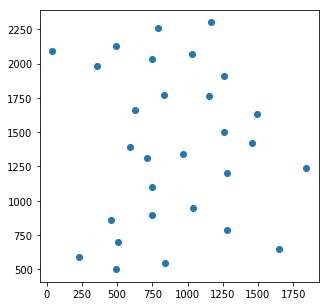

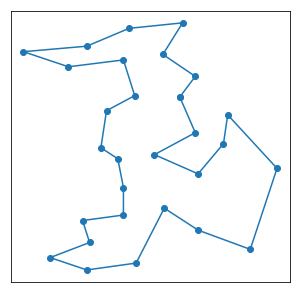

In [12]:
#defining points of the route
'''
n=29
grid_size = 50

def samplegrid(w, h, n):
    return [divmod(i, h) for i in random.sample(range(w * h), n)]

points = np.array(samplegrid(grid_size,grid_size,n))
'''
print('Optimal path= {}'.format(opt_path))
opt_cost0=cost_of_path(C,opt_path)
print('Optimal cost= {}'.format(opt_cost0))


plt.figure(figsize=(5, 5))
plt.scatter(points[:,0],points[:,1],marker='o')
plt.show() 

graphic_path=get_path(opt_path,points)

f=plt.figure(figsize=(5, 5))
plt.plot(graphic_path[:,0],graphic_path[:,1],marker='o')
plt.tick_params(
        axis='both',          # changes apply to the x-axis and y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,         # ticks along the left edge are off
        labelbottom=False, # labels along the bottom edge are off
        labelleft=False) # labels along the left edge are off
plt.show()

f.savefig(nombre+'.pdf', bbox_inches='tight')


In [13]:
'''
#Define cost matrix depending on distances
def cost_matrix(points):
    n=len(points)
    cost=np.zeros((n,n))
    for i,point in enumerate(points):
        #print(point)
        for j in range(n):
            cost[i,j]= math.sqrt((point[0]-points[j,0])**2 + (point[1]-points[j,1])**2)
    return cost

D = cost_matrix(points)
D = D/np.max(D)
#Symmetric matrix with 0 diagonal
#np.random.seed(4)
#C=5*np.random.rand(n,n)
#C=(C+C.T)
D=D+np.diag(np.ones(n))*np.amax(D)**2
#print(C[0,:])
print(D[0,:])
d=np.ndarray.flatten(D)
d = np.float32(d)
#print(d)
d=np.reshape(d,(d.shape[0],1))
'''

'\n#Define cost matrix depending on distances\ndef cost_matrix(points):\n    n=len(points)\n    cost=np.zeros((n,n))\n    for i,point in enumerate(points):\n        #print(point)\n        for j in range(n):\n            cost[i,j]= math.sqrt((point[0]-points[j,0])**2 + (point[1]-points[j,1])**2)\n    return cost\n\nD = cost_matrix(points)\nD = D/np.max(D)\n#Symmetric matrix with 0 diagonal\n#np.random.seed(4)\n#C=5*np.random.rand(n,n)\n#C=(C+C.T)\nD=D+np.diag(np.ones(n))*np.amax(D)**2\n#print(C[0,:])\nprint(D[0,:])\nd=np.ndarray.flatten(D)\nd = np.float32(d)\n#print(d)\nd=np.reshape(d,(d.shape[0],1))\n'

### Solution

$n$ is the number of vertices, depends on example

In [14]:
W, theta = W_theta(n)

In [15]:
num_epochs=300

In [16]:
graph = tf.Graph()

with graph.as_default():
    init=tf.global_variables_initializer()
    
    v=tf.constant(0,tf.float32)
    t=tf.constant(1,tf.float32)
    eps=tf.constant(2**(-6),tf.float32)
    t_true=tf.placeholder(tf.bool)

    tf_eta=tf.placeholder(tf.float32,[],name = 'eta')
    tf_lamb=tf.placeholder(tf.float32,[n**2,1],name = 'lambda')
    tf_tau1=tf.placeholder(tf.float32,[],name = 'tau1')
    tf_tau2=tf.placeholder(tf.float32,[n**2,1],name = 'tau2')
    tf_beta=tf.placeholder(tf.float32,[],name= 'beta')

    tf_W=tf.placeholder(tf.float32,[n**2,n**2],name='W')
    tf_theta=tf.placeholder(tf.float32,[n**2,1], name = 'theta')
    tf_c=tf.placeholder(tf.float32,[n**2,1], name = 'c')

    init_x=tf.placeholder(tf.float32,[n**2,1],name='x')
    init_u=tf.placeholder(tf.float32,[n**2,1],name='u')
    current_u=init_u
    current_x=init_x

    loop=my_loop()

In [17]:
beta=1.2

k=20
cmax=np.max(C1)
tau2 = np.log(C1.std(1)*k/cmax)
print(tau2)
tau2=np.repeat(tau2,n,axis=0)
tau2=np.float32(tau2)
tau2=np.reshape(tau2,(tau2.shape[0],1))

tau1=50000

[1.25971855 1.11678308 1.50256763 1.11567162 1.44642738 1.4709437
 1.480156   1.3146543  1.56807385 0.98252552 1.51268984 1.56177507
 0.95817209 1.50297035 1.28481995 1.15798077 1.5531434  1.38962572
 1.23556696 0.99316962 1.196267   1.58920776 1.3897995  1.15239791
 1.37710962 1.52287983 1.2553863  1.38650167 1.43720106]


### SWTA: t not variable

In [18]:
opt_cost=np.sum(C)
phi=2**(-6)
r_max=5

runs=10
running1=np.zeros(runs)
pathing1=[]
v_ing1=[]

for j in range(runs):
    print('run={}'.format(j))
    all_paths=[]
    v_vector=[]
    t_vector=[]
    K1=range(-3,1,1)
    K2=range(-4,-1,1)
    for eta in [2**i for i in K1]:
        for gamma in [2**i for i in K2]:
            print()
            lamb=(1/C1.std(1))
            lamb=gamma*lamb
            #print(lamb)
            lamb2=np.repeat(lamb,n,axis=0)
            lamb2=np.float32(lamb2)
            lamb2=np.reshape(lamb2,(lamb2.shape[0],1))
            print('eta = {} , gamma = {}'.format(eta,gamma))
            alpha=0.7
            while alpha <=0.9:
                print('alpha = {}'.format(alpha))
                x=np.zeros((n**2,1), dtype=np.float32)
                u=np.zeros((n**2,1), dtype=np.float32)
                paths=[]
                ts=[]
                vs=[]
                r=0
                while r < r_max:
                    diff=np.absolute(W.dot(x) - theta) < phi
                    s=sum(diff)
                    if s[0] < n**2:
                        with graph.as_default():
                            sess = tf.Session()
                            sess.run(init)
                            val_v,val_t,val_x, val_u = sess.run(loop,{tf_eta:eta,tf_lamb:lamb2,t_true:False ,tf_tau1:tau1, 
                                                                      tf_tau2:tau2 , tf_beta:beta ,tf_W:W, tf_theta:theta, 
                                                                      tf_c: c,init_x:x,init_u:u })
                            sess.close()
                    else:
                        print("Conditions (2) and (3) well satisfied")
                        break
                    bar_x=np.reshape(val_x,(n,n))
                    #print (bar_x)
                    (x,path)=winner_takes_all(bar_x,alpha)
                    str1=str(eta)
                    str2=str(gamma)
                    str3=str(alpha)
                    path1=list(set(path))
                    path=L(path,eta_n=str1,gamma_n=str2,alpha_n=str3)
                    if len(path1)== n:
                        #print('I found a path')
                        cost=cost_of_path(C,path)
                        if cost < opt_cost:
                            #print('It is a better path')
                            x=np.ndarray.flatten(x)
                            x=np.reshape(x,(x.shape[0],1))
                            opt_cost=cost
                            u=val_u
                            paths.append(path)
                            vs.append(val_v)
                            ts.append(val_t)
                        else:
                            #print('Not a better path')
                            x=np.ndarray.flatten(x)
                            x=np.reshape(x,(x.shape[0],1))
                            u=np.zeros((n**2,1), dtype=np.float32)
                            x=np.zeros((n**2,1), dtype=np.float32)
                    else:
                        #print('I restarted x ')
                        u=np.zeros((n**2,1), dtype=np.float32)
                        x=np.zeros((n**2,1), dtype=np.float32)
                    r=r+1
                all_paths.append(paths)
                t_vector.append(ts)
                v_vector.append(vs)
                alpha=alpha+0.1
                
    size=[len(i) for i in all_paths]
    for k in np.arange(len(size)-1,0,-1):
        if size[k] > 0:
            final_path=all_paths[k][size[k]-1]
            break
    v_ing1.append(v_vector[k])
    pathing1.append(final_path)
    final_cost=cost_of_path(C,final_path)
    running1[j]=final_cost

run=0

eta = 0.125 , gamma = 0.0625
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.125 , gamma = 0.125
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.125 , gamma = 0.25
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.25 , gamma = 0.0625
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.25 , gamma = 0.125
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.25 , gamma = 0.25
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.5 , gamma = 0.0625
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.5 , gamma = 0.125
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.5 , gamma = 0.25
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 1 , gamma = 0.0625
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 1 , gamma = 0.125
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 1 , gamma = 0.25
alpha = 0.7
alpha = 0.8
alpha = 0.9
run=1

eta = 0.125 , gamma = 0.0625
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.125 , gamma = 0.125
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.125 , gamma = 0.25
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.25 , gamma = 0.0625
alpha

#### Ploting the solution to the graph

In [19]:
print(running1)

[1673. 1673. 1673. 1673. 1673. 1673. 1673. 1673. 1673. 1673.]


best = 1673.0, mean = 1673.0 , std = 0.0
eta = 0.5 , gamma = 0.0625, alpha = 0.8
epochs = [3.0]
Optimal path= [15, 22, 6, 24, 10, 21, 16, 13, 17, 14, 3, 9, 19, 1, 28, 2, 25, 8, 11, 5, 4, 20, 0, 27, 7, 26, 23, 12, 18, 15]
cost=1673.0


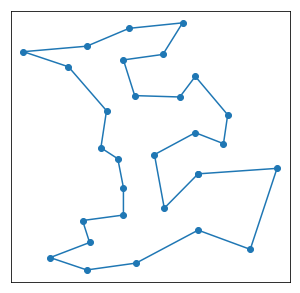

In [20]:
index1=np.min(np.argmin(running1))
best1=np.min(running1)
mid1=np.mean(running1)
std1=np.std(running1)
final_path1=pathing1[index1]


print('best = {}, mean = {} , std = {}'.format(best1,mid1,std1))
print('eta = {} , gamma = {}, alpha = {}'.format(final_path1.eta_n,final_path1.gamma_n,final_path1.alpha_n))
print('epochs = {}'.format(v_ing1[index1]))
print('Optimal path= {}'.format(final_path1))
final_cost1=cost_of_path(C,final_path1)
print('cost={}'.format(final_cost1))

graphic_path1= get_path(final_path1,points)

f=plt.figure(figsize=(5, 5))
plt.plot(graphic_path1[:,0],graphic_path1[:,1],marker='o')
plt.tick_params(
        axis='both',          # changes apply to the x-axis and y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,         # ticks along the left edge are off
        labelbottom=False, # labels along the bottom edge are off
        labelleft=False) # labels along the left edge are off
plt.show()

f.savefig(nombre+'_Sfalse.pdf', bbox_inches='tight')

In [21]:
'''
eta=final_path1.eta_n
gamma=final_path1.gamma_n
lamb=(1/C1.std(1))
lamb=gamma*lamb
#print(lamb)
lamb2=np.repeat(lamb,n,axis=0)
lamb2=np.float32(lamb2)
lamb2=np.reshape(lamb2,(lamb2.shape[0],1))

with graph.as_default():
    sess = tf.Session()
    sess.run(init)
    val_v,val_t,val_x, val_u = sess.run(loop,{tf_eta:eta,tf_lamb:lamb2,t_true:False ,tf_tau1:tau1, 
                                              tf_tau2:tau2 , tf_beta:beta ,tf_W:W, tf_theta:theta, 
                                              tf_c: c,init_x:x,init_u:u })
    sess.close()
bar_x=np.reshape(val_x,(n,n))
print (np.sum(bar_x,axis=1))
'''

'\neta=final_path1.eta_n\ngamma=final_path1.gamma_n\nlamb=(1/C1.std(1))\nlamb=gamma*lamb\n#print(lamb)\nlamb2=np.repeat(lamb,n,axis=0)\nlamb2=np.float32(lamb2)\nlamb2=np.reshape(lamb2,(lamb2.shape[0],1))\n\nwith graph.as_default():\n    sess = tf.Session()\n    sess.run(init)\n    val_v,val_t,val_x, val_u = sess.run(loop,{tf_eta:eta,tf_lamb:lamb2,t_true:False ,tf_tau1:tau1, \n                                              tf_tau2:tau2 , tf_beta:beta ,tf_W:W, tf_theta:theta, \n                                              tf_c: c,init_x:x,init_u:u })\n    sess.close()\nbar_x=np.reshape(val_x,(n,n))\nprint (np.sum(bar_x,axis=1))\n'

### HWTA: t not variable

In [22]:
opt_cost=np.sum(C)
phi=2**(-6)
r_max=5

runs=10
running3=np.zeros(runs)
pathing3=[]
v_ing3=[]

for j in range(runs):
    print('run={}'.format(j))
    all_paths=[]
    v_vector=[]
    t_vector=[]
    K1=range(-3,1,1)
    K2=range(-4,-1,1)
    for eta in [2**i for i in K1]:
        for gamma in [2**i for i in K2]:
            print()
            lamb=(1/C1.std(1))
            lamb=gamma*lamb
            #print(lamb)
            lamb2=np.repeat(lamb,n,axis=0)
            lamb2=np.float32(lamb2)
            lamb2=np.reshape(lamb2,(lamb2.shape[0],1))
            print('eta = {} , gamma = {}'.format(eta,gamma))
            alpha=1
            while alpha <=1:
                print('alpha = {}'.format(alpha))
                x=np.zeros((n**2,1), dtype=np.float32)
                u=np.zeros((n**2,1), dtype=np.float32)
                paths=[]
                ts=[]
                vs=[]
                r=0
                while r < r_max:
                    diff=np.absolute(W.dot(x) - theta) < phi
                    s=sum(diff)
                    if s[0] < n**2:
                        with graph.as_default():
                            sess = tf.Session()
                            sess.run(init)
                            val_v,val_t,val_x, val_u = sess.run(loop,{tf_eta:eta,tf_lamb:lamb2,t_true:False ,tf_tau1:tau1, 
                                                                      tf_tau2:tau2 , tf_beta:beta ,tf_W:W, tf_theta:theta, 
                                                                      tf_c: c,init_x:x,init_u:u })
                            sess.close()
                    else:
                        print("Conditions (2) and (3) well satisfied")
                        break
                    bar_x=np.reshape(val_x,(n,n))
                    #print (bar_x)
                    (x,path)=winner_takes_all(bar_x,alpha)
                    str1=str(eta)
                    str2=str(gamma)
                    str3=str(alpha)
                    path1=list(set(path))
                    path=L(path,eta_n=str1,gamma_n=str2,alpha_n=str3)
                    if len(path1)== n:
                        #print('I found a path')
                        cost=cost_of_path(C,path)
                        if cost < opt_cost:
                            #print('It is a better path')
                            x=np.ndarray.flatten(x)
                            x=np.reshape(x,(x.shape[0],1))
                            opt_cost=cost
                            u=val_u
                            paths.append(path)
                            vs.append(val_v)
                            ts.append(val_t)
                        else:
                            #print('Not a better path')
                            x=np.ndarray.flatten(x)
                            x=np.reshape(x,(x.shape[0],1))
                            u=np.zeros((n**2,1), dtype=np.float32)
                            x=np.zeros((n**2,1), dtype=np.float32)
                    else:
                        #print('I restarted x ')
                        u=np.zeros((n**2,1), dtype=np.float32)
                        x=np.zeros((n**2,1), dtype=np.float32)
                    r=r+1
                all_paths.append(paths)
                t_vector.append(ts)
                v_vector.append(vs)
                alpha=alpha+0.1
                
    size=[len(i) for i in all_paths]
    for k in np.arange(len(size)-1,0,-1):
        if size[k] > 0:
            final_path=all_paths[k][size[k]-1]
            break
    v_ing3.append(v_vector[k])
    pathing3.append(final_path)
    final_cost=cost_of_path(C,final_path)
    running3[j]=final_cost

run=0

eta = 0.125 , gamma = 0.0625
alpha = 1

eta = 0.125 , gamma = 0.125
alpha = 1

eta = 0.125 , gamma = 0.25
alpha = 1

eta = 0.25 , gamma = 0.0625
alpha = 1

eta = 0.25 , gamma = 0.125
alpha = 1

eta = 0.25 , gamma = 0.25
alpha = 1

eta = 0.5 , gamma = 0.0625
alpha = 1

eta = 0.5 , gamma = 0.125
alpha = 1

eta = 0.5 , gamma = 0.25
alpha = 1

eta = 1 , gamma = 0.0625
alpha = 1

eta = 1 , gamma = 0.125
alpha = 1

eta = 1 , gamma = 0.25
alpha = 1
run=1

eta = 0.125 , gamma = 0.0625
alpha = 1

eta = 0.125 , gamma = 0.125
alpha = 1

eta = 0.125 , gamma = 0.25
alpha = 1

eta = 0.25 , gamma = 0.0625
alpha = 1

eta = 0.25 , gamma = 0.125
alpha = 1

eta = 0.25 , gamma = 0.25
alpha = 1

eta = 0.5 , gamma = 0.0625
alpha = 1

eta = 0.5 , gamma = 0.125
alpha = 1

eta = 0.5 , gamma = 0.25
alpha = 1

eta = 1 , gamma = 0.0625
alpha = 1

eta = 1 , gamma = 0.125
alpha = 1

eta = 1 , gamma = 0.25
alpha = 1
run=2

eta = 0.125 , gamma = 0.0625
alpha = 1

eta = 0.125 , gamma = 0.125
alpha = 1

eta = 0.

In [23]:
print(running3)

[1673. 1673. 1673. 1673. 1673. 1673. 1673. 1673. 1673. 1673.]


#### Ploting the solution to the graph

best = 1673.0, mean = 1673.0 , std = 0.0
eta = 0.5 , gamma = 0.0625, alpha = 1
epochs = [3.0]
Optimal path= [15, 22, 6, 24, 10, 21, 16, 13, 17, 14, 3, 9, 19, 1, 28, 2, 25, 8, 11, 5, 4, 20, 0, 27, 7, 26, 23, 12, 18, 15]
cost=1673.0


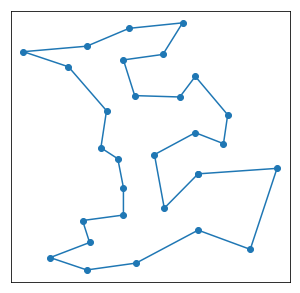

In [24]:
index3=np.min(np.argmin(running3))
best3=np.min(running3)
mid3=np.mean(running3)
std3=np.std(running3)
final_path3=pathing3[index3]

print('best = {}, mean = {} , std = {}'.format(best3,mid3,std3))        
print('eta = {} , gamma = {}, alpha = {}'.format(final_path3.eta_n,final_path3.gamma_n,final_path3.alpha_n))
print('epochs = {}'.format(v_ing3[index3]))
print('Optimal path= {}'.format(final_path3))
final_cost3=cost_of_path(C,final_path3)
print('cost={}'.format(final_cost3))

graphic_path3= get_path(final_path3,points)

f=plt.figure(figsize=(5, 5))
plt.plot(graphic_path3[:,0],graphic_path3[:,1],marker='o')
plt.tick_params(
        axis='both',          # changes apply to the x-axis and y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,         # ticks along the left edge are off
        labelbottom=False, # labels along the bottom edge are off
        labelleft=False) # labels along the left edge are off
plt.show()

f.savefig(nombre+'_Hfalse.pdf', bbox_inches='tight')

### SWTA: t  variable

In [25]:
beta=1

tau1=50000

In [26]:
opt_cost=np.sum(C)
phi=2**(-6)
r_max=5

runs=10
running2=np.zeros(runs)
pathing2=[]
v_ing2=[]

for j in range(runs):
    print('run={}'.format(j))
    all_paths=[]
    v_vector=[]
    t_vector=[]
    K1=range(-3,1,1)
    K2=range(-4,-1,1)
    for eta in [2**i for i in K1]:
        for gamma in [2**i for i in K2]:
            print()
            lamb=(1/C1.std(1))
            lamb=gamma*lamb
            #print(lamb)
            lamb2=np.repeat(lamb,n,axis=0)
            lamb2=np.float32(lamb2)
            lamb2=np.reshape(lamb2,(lamb2.shape[0],1))
            print('eta = {} , gamma = {}'.format(eta,gamma))
            alpha=0.7
            while alpha <=0.9:
                print('alpha = {}'.format(alpha))
                x=np.zeros((n**2,1), dtype=np.float32)
                u=np.zeros((n**2,1), dtype=np.float32)
                paths=[]
                ts=[]
                vs=[]
                r=0
                while r < r_max:
                    diff=np.absolute(W.dot(x) - theta) < phi
                    s=sum(diff)
                    if s[0] < n**2:
                        with graph.as_default():
                            sess = tf.Session()
                            sess.run(init)
                            val_v,val_t,val_x, val_u = sess.run(loop,{tf_eta:eta,tf_lamb:lamb2,t_true:True ,tf_tau1:tau1, 
                                                                      tf_tau2:tau2 , tf_beta:beta ,tf_W:W, tf_theta:theta, 
                                                                      tf_c: c,init_x:x,init_u:u })
                            sess.close()
                    else:
                        print("Conditions (2) and (3) well satisfied")
                        break
                    bar_x=np.reshape(val_x,(n,n))
                    #print (bar_x)
                    (x,path)=winner_takes_all(bar_x,alpha)
                    str1=str(eta)
                    str2=str(gamma)
                    str3=str(alpha)
                    path1=list(set(path))
                    path=L(path,eta_n=str1,gamma_n=str2,alpha_n=str3)
                    if len(path1)== n:
                        #print('I found a path')
                        cost=cost_of_path(C,path)
                        if cost < opt_cost:
                            #print('It is a better path')
                            x=np.ndarray.flatten(x)
                            x=np.reshape(x,(x.shape[0],1))
                            opt_cost=cost
                            u=val_u
                            paths.append(path)
                            vs.append(val_v)
                            ts.append(val_t)
                        else:
                            #print('Not a better path')
                            x=np.ndarray.flatten(x)
                            x=np.reshape(x,(x.shape[0],1))
                            u=np.zeros((n**2,1), dtype=np.float32)
                            x=np.zeros((n**2,1), dtype=np.float32)
                    else:
                        #print('I restarted x ')
                        u=np.zeros((n**2,1), dtype=np.float32)
                        x=np.zeros((n**2,1), dtype=np.float32)
                    r=r+1
                all_paths.append(paths)
                t_vector.append(ts)
                v_vector.append(vs)
                alpha=alpha+0.1
                
    size=[len(i) for i in all_paths]
    for k in np.arange(len(size)-1,0,-1):
        if size[k] > 0:
            final_path=all_paths[k][size[k]-1]
            break
    v_ing2.append(v_vector[k])
    pathing2.append(final_path)
    final_cost=cost_of_path(C,final_path)
    running2[j]=final_cost

run=0

eta = 0.125 , gamma = 0.0625
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.125 , gamma = 0.125
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.125 , gamma = 0.25
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.25 , gamma = 0.0625
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.25 , gamma = 0.125
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.25 , gamma = 0.25
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.5 , gamma = 0.0625
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.5 , gamma = 0.125
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.5 , gamma = 0.25
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 1 , gamma = 0.0625
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 1 , gamma = 0.125
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 1 , gamma = 0.25
alpha = 0.7
alpha = 0.8
alpha = 0.9
run=1

eta = 0.125 , gamma = 0.0625
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.125 , gamma = 0.125
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.125 , gamma = 0.25
alpha = 0.7
alpha = 0.8
alpha = 0.9

eta = 0.25 , gamma = 0.0625
alpha

In [27]:
print(running2)

[1673. 1673. 1673. 1673. 1668. 1668. 1668. 1668. 1668. 1668.]


### Ploting the solution to the graph

best = 1668.0, mean = 1670.0 , std = 2.44948974278
eta = 0.5 , gamma = 0.125, alpha = 0.8
epochs = [3.0]
Optimal path= [15, 26, 22, 6, 24, 10, 21, 16, 13, 17, 14, 3, 9, 19, 1, 28, 2, 25, 8, 11, 5, 4, 20, 0, 27, 7, 23, 12, 18, 15]
cost=1668.0


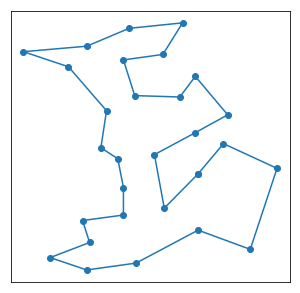

In [28]:
index2=np.min(np.argmin(running2))
best2=np.min(running2)
mid2=np.mean(running2)
std2=np.std(running2)
final_path2=pathing2[index2]


print('best = {}, mean = {} , std = {}'.format(best2,mid2,std2))
print('eta = {} , gamma = {}, alpha = {}'.format(final_path2.eta_n,final_path2.gamma_n,final_path2.alpha_n))
print('epochs = {}'.format(v_ing2[index2]))
print('Optimal path= {}'.format(final_path2))
final_cost2=cost_of_path(C,final_path2)
print('cost={}'.format(final_cost2))

graphic_path2= get_path(final_path2,points)

f=plt.figure(figsize=(5, 5))
plt.plot(graphic_path2[:,0],graphic_path2[:,1],marker='o')
plt.tick_params(
        axis='both',          # changes apply to the x-axis and y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,         # ticks along the left edge are off
        labelbottom=False, # labels along the bottom edge are off
        labelleft=False) # labels along the left edge are off
plt.show()

f.savefig(nombre+'_Sfalse.pdf', bbox_inches='tight')

### HWTA: t  variable

In [29]:
beta=1

tau1=50000

In [30]:
opt_cost=np.sum(C)
phi=2**(-6)
r_max=5

runs=10
running4=np.zeros(runs)
pathing4=[]
v_ing4=[]

for j in range(runs):
    print('run={}'.format(j))
    all_paths=[]
    v_vector=[]
    t_vector=[]
    K1=range(-3,1,1)
    K2=range(-4,-1,1)
    for eta in [2**i for i in K1]:
        for gamma in [2**i for i in K2]:
            print()
            lamb=(1/C1.std(1))
            lamb=gamma*lamb
            #print(lamb)
            lamb2=np.repeat(lamb,n,axis=0)
            lamb2=np.float32(lamb2)
            lamb2=np.reshape(lamb2,(lamb2.shape[0],1))
            print('eta = {} , gamma = {}'.format(eta,gamma))
            alpha=1
            while alpha <=1:
                print('alpha = {}'.format(alpha))
                x=np.zeros((n**2,1), dtype=np.float32)
                u=np.zeros((n**2,1), dtype=np.float32)
                paths=[]
                ts=[]
                vs=[]
                r=0
                while r < r_max:
                    diff=np.absolute(W.dot(x) - theta) < phi
                    s=sum(diff)
                    if s[0] < n**2:
                        with graph.as_default():
                            sess = tf.Session()
                            sess.run(init)
                            val_v,val_t,val_x, val_u = sess.run(loop,{tf_eta:eta,tf_lamb:lamb2,t_true:True ,tf_tau1:tau1, 
                                                                      tf_tau2:tau2 , tf_beta:beta ,tf_W:W, tf_theta:theta, 
                                                                      tf_c: c,init_x:x,init_u:u })
                            sess.close()
                    else:
                        print("Conditions (2) and (3) well satisfied")
                        break
                    bar_x=np.reshape(val_x,(n,n))
                    #print (bar_x)
                    (x,path)=winner_takes_all(bar_x,alpha)
                    str1=str(eta)
                    str2=str(gamma)
                    str3=str(alpha)
                    path1=list(set(path))
                    path=L(path,eta_n=str1,gamma_n=str2,alpha_n=str3)
                    if len(path1)== n:
                        #print('I found a path')
                        cost=cost_of_path(C,path)
                        if cost < opt_cost:
                            #print('It is a better path')
                            x=np.ndarray.flatten(x)
                            x=np.reshape(x,(x.shape[0],1))
                            opt_cost=cost
                            u=val_u
                            paths.append(path)
                            vs.append(val_v)
                            ts.append(val_t)
                        else:
                            #print('Not a better path')
                            x=np.ndarray.flatten(x)
                            x=np.reshape(x,(x.shape[0],1))
                            u=np.zeros((n**2,1), dtype=np.float32)
                            x=np.zeros((n**2,1), dtype=np.float32)
                    else:
                        #print('I restarted x ')
                        u=np.zeros((n**2,1), dtype=np.float32)
                        x=np.zeros((n**2,1), dtype=np.float32)
                    r=r+1
                all_paths.append(paths)
                t_vector.append(ts)
                v_vector.append(vs)
                alpha=alpha+0.1
                
    size=[len(i) for i in all_paths]
    for k in np.arange(len(size)-1,0,-1):
        if size[k] > 0:
            final_path=all_paths[k][size[k]-1]
            break
    v_ing4.append(t_vector[k])
    pathing4.append(final_path)
    final_cost=cost_of_path(C,final_path)
    running4[j]=final_cost

run=0

eta = 0.125 , gamma = 0.0625
alpha = 1

eta = 0.125 , gamma = 0.125
alpha = 1

eta = 0.125 , gamma = 0.25
alpha = 1

eta = 0.25 , gamma = 0.0625
alpha = 1

eta = 0.25 , gamma = 0.125
alpha = 1

eta = 0.25 , gamma = 0.25
alpha = 1

eta = 0.5 , gamma = 0.0625
alpha = 1

eta = 0.5 , gamma = 0.125
alpha = 1

eta = 0.5 , gamma = 0.25
alpha = 1

eta = 1 , gamma = 0.0625
alpha = 1

eta = 1 , gamma = 0.125
alpha = 1

eta = 1 , gamma = 0.25
alpha = 1
run=1

eta = 0.125 , gamma = 0.0625
alpha = 1

eta = 0.125 , gamma = 0.125
alpha = 1

eta = 0.125 , gamma = 0.25
alpha = 1

eta = 0.25 , gamma = 0.0625
alpha = 1

eta = 0.25 , gamma = 0.125
alpha = 1

eta = 0.25 , gamma = 0.25
alpha = 1

eta = 0.5 , gamma = 0.0625
alpha = 1

eta = 0.5 , gamma = 0.125
alpha = 1

eta = 0.5 , gamma = 0.25
alpha = 1

eta = 1 , gamma = 0.0625
alpha = 1

eta = 1 , gamma = 0.125
alpha = 1

eta = 1 , gamma = 0.25
alpha = 1
run=2

eta = 0.125 , gamma = 0.0625
alpha = 1

eta = 0.125 , gamma = 0.125
alpha = 1

eta = 0.

In [31]:
print(running4)

[1674. 1674. 1674. 1674. 1668. 1668. 1668. 1668. 1668. 1668.]


### Ploting the solution to the graph

best = 1668.0, mean = 1670.4 , std = 2.93938769134
eta = 0.5 , gamma = 0.125, alpha = 1
epochs = [301.0]
Optimal path= [15, 26, 22, 6, 24, 10, 21, 16, 13, 17, 14, 3, 9, 19, 1, 28, 2, 25, 8, 11, 5, 4, 20, 0, 27, 7, 23, 12, 18, 15]
cost=1668.0


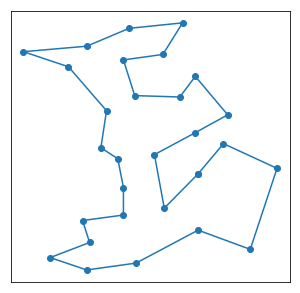

In [32]:
index4=np.min(np.argmin(running4))
best4=np.min(running4)
mid4=np.mean(running4)
std4=np.std(running4)
final_path4=pathing4[index4]


print('best = {}, mean = {} , std = {}'.format(best4,mid4,std4))
print('eta = {} , gamma = {}, alpha = {}'.format(final_path4.eta_n,final_path4.gamma_n,final_path4.alpha_n))
print('epochs = {}'.format(v_ing4[index4]))
print('Optimal path= {}'.format(final_path4))
final_cost4=cost_of_path(C,final_path4)
print('cost={}'.format(final_cost4))

graphic_path4= get_path(final_path4,points)

f=plt.figure(figsize=(5, 5))
plt.plot(graphic_path4[:,0],graphic_path4[:,1],marker='o')
plt.tick_params(
        axis='both',          # changes apply to the x-axis and y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,         # ticks along the left edge are off
        labelbottom=False, # labels along the bottom edge are off
        labelleft=False) # labels along the left edge are off
plt.show()

f.savefig(nombre+'_Htrue.pdf', bbox_inches='tight')